In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv("credit.csv")

In [10]:
df.head()

,age,income,loan_amount,credit_score,employment_status,approved
0,60,7896,37090,low,employed,0
1,35,3794,11373,low,employed,1
2,60,5499,45588,medium,employed,0
3,26,14630,33852,high,unemployed,0
4,25,3606,11245,medium,unemployed,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                370 non-null    int64 
 1   income             370 non-null    int64 
 2   loan_amount        370 non-null    int64 
 3   credit_score       370 non-null    object
 4   employment_status  370 non-null    object
 5   approved           370 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 17.5+ KB


In [12]:
df.isna().sum()

age                  0
income               0
loan_amount          0
credit_score         0
employment_status    0
approved             0
dtype: int64

In [13]:
df_encoded = pd.get_dummies(df,columns=["credit_score", "employment_status"],drop_first=True)
X = df_encoded.drop("approved",axis=1)
y = df_encoded["approved"]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape
X_test.shape

(74, 6)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train,y_train)

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
confusion_matrix(y_test,y_pred)

array([[ 5, 26],
       [ 8, 35]])

In [23]:
print("\nClassification Report:")
classification_report(y_test,y_pred)


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.38      0.16      0.23        31\n           1       0.57      0.81      0.67        43\n\n    accuracy                           0.54        74\n   macro avg       0.48      0.49      0.45        74\nweighted avg       0.49      0.54      0.49        74\n'

In [25]:
roc_auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

In [26]:
roc_auc

np.float64(0.390847711927982)

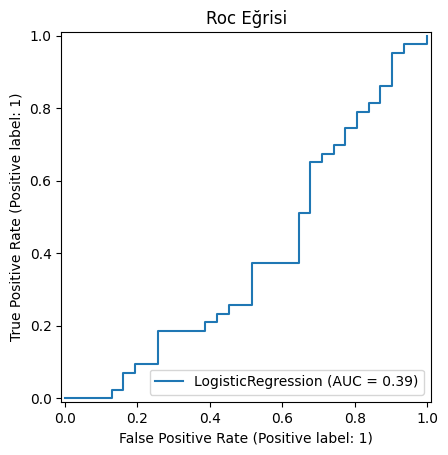

In [27]:
RocCurveDisplay.from_estimator(model,X_test,y_test)
plt.title("Roc Eğrisi")
plt.show()

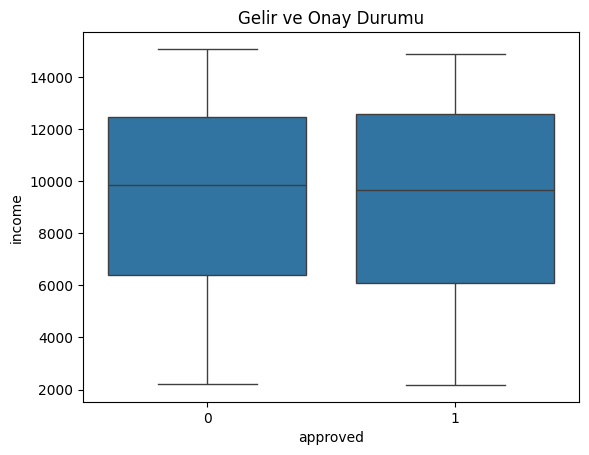

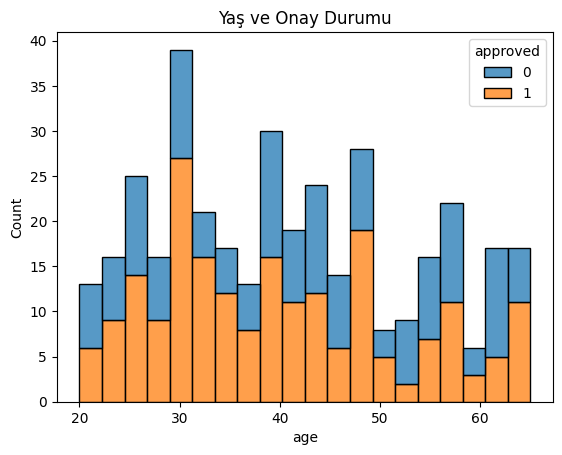

In [36]:
sbn.boxplot(x="approved", y="income", data=df)
plt.title("Gelir ve Onay Durumu")
plt.show()

sbn.histplot(data=df, x="age", hue="approved", multiple="stack", bins=20)
plt.title("Yaş ve Onay Durumu")
plt.show()

In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_rf_pred = rf_model.predict(X_test)

In [38]:
classification_report(y_test,y_rf_pred)

'              precision    recall  f1-score   support\n\n           0       0.50      0.48      0.49        31\n           1       0.64      0.65      0.64        43\n\n    accuracy                           0.58        74\n   macro avg       0.57      0.57      0.57        74\nweighted avg       0.58      0.58      0.58        74\n'

In [39]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv = 5,scoring="accuracy")
grid_search.fit(X_train,y_train)

print("En iyi parametreler:",grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

En iyi parametreler: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


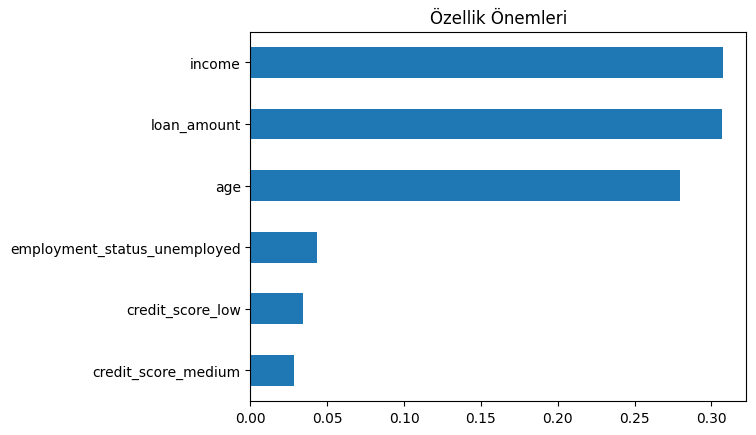

In [40]:
importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Özellik Önemleri")
plt.show()


In [41]:
errors = X_test[y_test != y_pred]
print("Hatalı Sınıflandırmalar: ")
errors

Hatalı Sınıflandırmalar: 


,age,income,loan_amount,credit_score_low,credit_score_medium,employment_status_unemployed
327,57,11268,20359,False,True,False
15,41,5509,40325,False,True,True
57,61,9993,39411,False,True,False
76,27,2396,41845,False,False,True
119,53,14571,25933,False,False,False
126,43,12182,31402,False,True,False
39,45,14197,7323,False,False,True
153,30,6156,44841,False,True,True
155,56,8418,43290,False,False,True
278,25,12231,46036,True,False,True


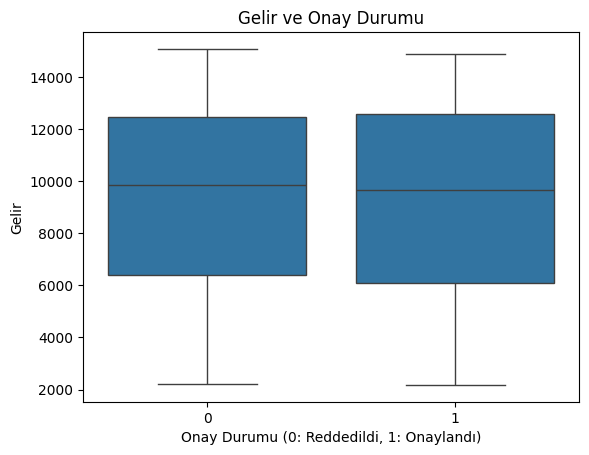

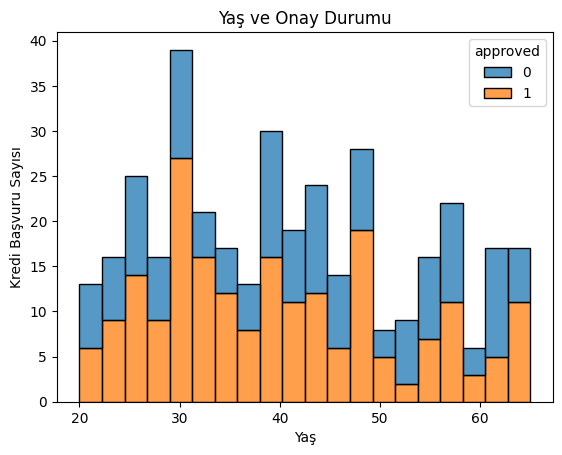

In [43]:
# Gelire göre onay durumu
sbn.boxplot(x="approved", y="income", data=df)
plt.title("Gelir ve Onay Durumu")
plt.xlabel("Onay Durumu (0: Reddedildi, 1: Onaylandı)")
plt.ylabel("Gelir")
plt.show()

# Yaşa göre onay durumu
sbn.histplot(data=df, x="age", hue="approved", multiple="stack", bins=20)
plt.title("Yaş ve Onay Durumu")
plt.xlabel("Yaş")
plt.ylabel("Kredi Başvuru Sayısı")
plt.show()



In [44]:
df_model = DecisionTreeClassifier(random_state=42)
df_model.fit(X_train,y_train)
y_df_pred = df_model.predict(X_test)
print("Karar Ağacı Sınıflandırma Raporu:")
print(classification_report(y_test, y_df_pred))

Karar Ağacı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.41      0.48      0.44        31
           1       0.57      0.49      0.53        43

    accuracy                           0.49        74
   macro avg       0.49      0.49      0.48        74
weighted avg       0.50      0.49      0.49        74



In [45]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_rf_pred = rf_model.predict(X_test)
print("Random Forest Sınıflandırma Raporu:")
print(classification_report(y_test,y_rf_pred))

Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        31
           1       0.64      0.65      0.64        43

    accuracy                           0.58        74
   macro avg       0.57      0.57      0.57        74
weighted avg       0.58      0.58      0.58        74



In [46]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("En İyi Parametreler:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

En İyi Parametreler: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


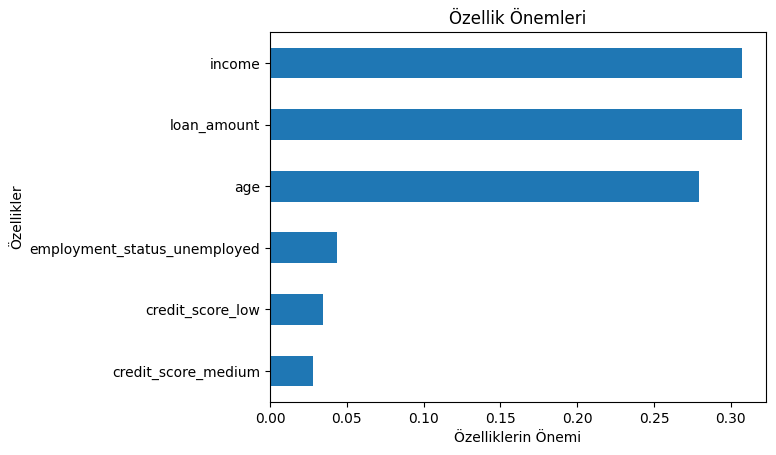

In [47]:
# Özellik önemlerini görselleştirme
importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Özellik Önemleri")
plt.xlabel("Özelliklerin Önemi")
plt.ylabel("Özellikler")
plt.show()


In [48]:
errors = X_test[y_test != y_rf_pred]
print("Hatalı Sınıflandırmalar:")
errors

Hatalı Sınıflandırmalar:


,age,income,loan_amount,credit_score_low,credit_score_medium,employment_status_unemployed
33,59,11461,41719,True,False,True
15,41,5509,40325,False,True,True
76,27,2396,41845,False,False,True
119,53,14571,25933,False,False,False
126,43,12182,31402,False,True,False
233,63,2707,21910,True,False,True
153,30,6156,44841,False,True,True
231,34,12797,17884,False,True,True
9,26,9606,21478,False,True,False
180,47,10392,49563,False,False,True
